## Box plots for ``natural diversity''¶

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 10  # that's default image size for this interactive session

In [2]:
from sample_reader.sample_reader import SampleReader

In [3]:
samples_fv = SampleReader().read('AbVitro/flu_time_course/FV/', ['25'])
samples_gmc = SampleReader().read('AbVitro/flu_time_course/GMC/', ['8'])
samples_ido = SampleReader().read('AbVitro/flu_time_course/IDO/')
samples_age = SampleReader().read('age/')
samples_paired = SampleReader().read('AbVitro/paired/')

In [4]:
import spots.spots as spots

hotspots, coldspots = spots.hotspots(), spots.coldspots()
hotspots_ind, coldspots_ind = spots.hotspots_indexes(), spots.coldspots_indexes()

In [5]:
import numpy as np

In [6]:
colors = np.array(['black'] * 1024)
colors[hotspots_ind] = 'red'
colors[coldspots_ind] = 'blue'

In [7]:
def get_samples(chain_type='IGH', strategy='NoKNeighbours'):
    result = np.concatenate((samples_fv[strategy][chain_type],
                             samples_ido[strategy][chain_type],
                             samples_gmc[strategy][chain_type],
                             samples_paired[strategy][chain_type]))
    if chain_type != 'IGH':
        return result
    else:
        return np.concatenate((result, samples_age[strategy][chain_type]))

In [8]:
from calculate_mutability_diversity import *

In [14]:
def draw_mutability_graph(samples, coverage_threshold=100, mean_function=np.median, threshold_function=np.min,
                          hotspot_color='red', coldspot_color='blue'):
    def get_spot_colors():
        colors = np.array(['black'] * 1024)
        colors[spots.hotspots_indexes()] = hotspot_color
        colors[spots.coldspots_indexes()] = coldspot_color
        return colors
    
    colors = get_spot_colors()
    
    coverage = mean_function(threshold_function(samples, 2), 0)
    ind_coverage = coverage > coverage_threshold
    
    mutability_diversity, sorted_ind = calculate_mutability_diversity(samples, calculate_mutability, ind_coverage)
    
    g = sns.boxplot(mutability_diversity.T)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    [t.set_color(i) for (i,t) in zip(colors[ind_coverage][sorted_ind], g.xaxis.get_ticklabels())]
    [t.set_facecolor(i) for (i,t) in zip(colors[ind_coverage][sorted_ind], g.artists)]

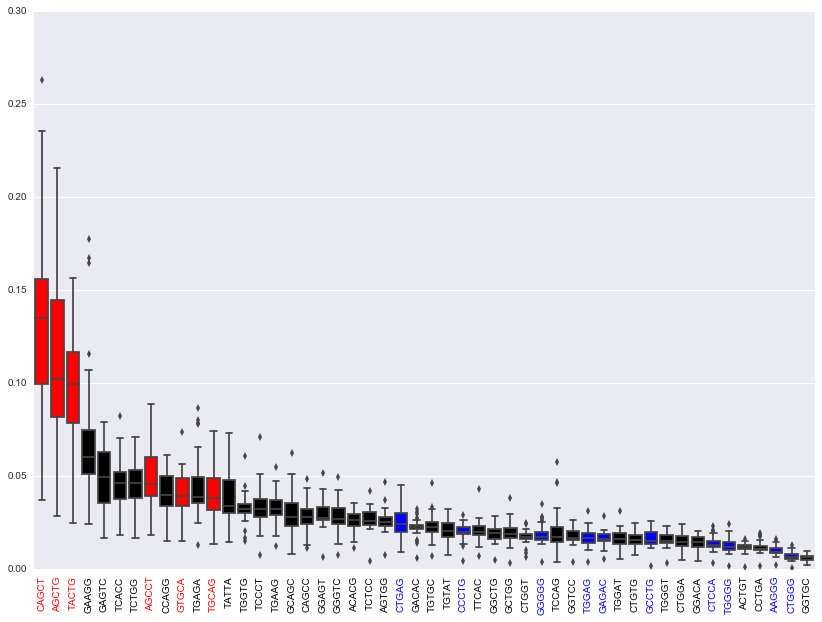

In [21]:
draw_mutability_graph(get_samples(), coverage_threshold=60000, mean_function=np.median, threshold_function=np.max)